<a href="https://colab.research.google.com/github/Rushi589/Deep_learning/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.isnull().sum()

,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.corr(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**EDA**

In [ ]:
for i in df.columns[df.dtypes!='object']:
  print(i,df[i].skew())


CreditScore -0.07160660820092675
Age 1.0113202630234552
Tenure 0.01099145797717904
Balance -0.14110871094154384
NumOfProducts 0.7455678882823168
HasCrCard -0.9018115952400578
IsActiveMember -0.06043662833499078
EstimatedSalary 0.0020853576615585162
Exited 1.4716106649378211


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

-0.07160660820092675


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


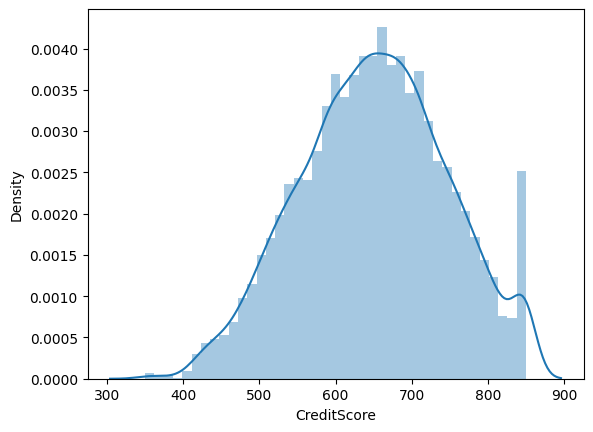

1.0113202630234552


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


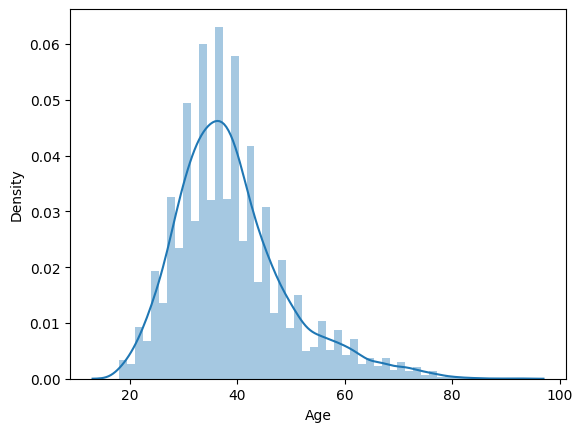

0.01099145797717904


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


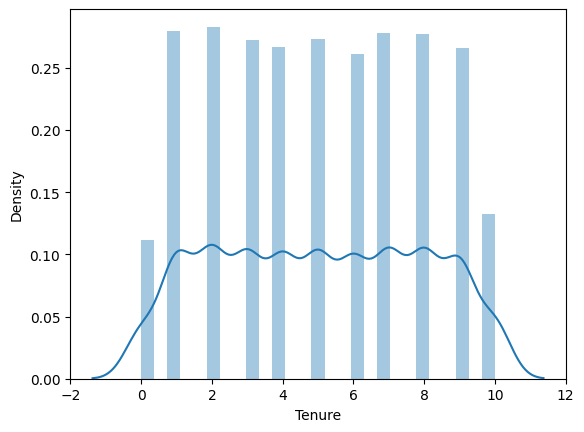

-0.14110871094154384


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


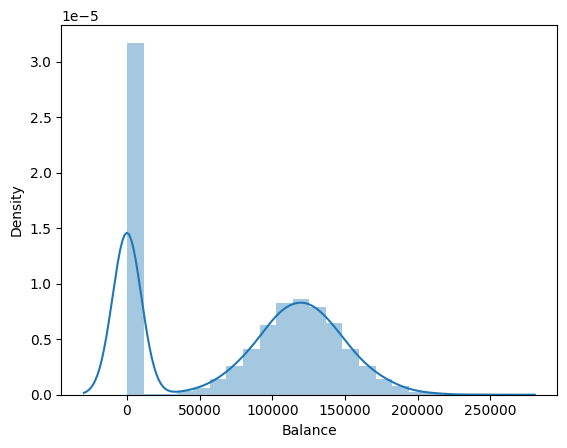

0.7455678882823168


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


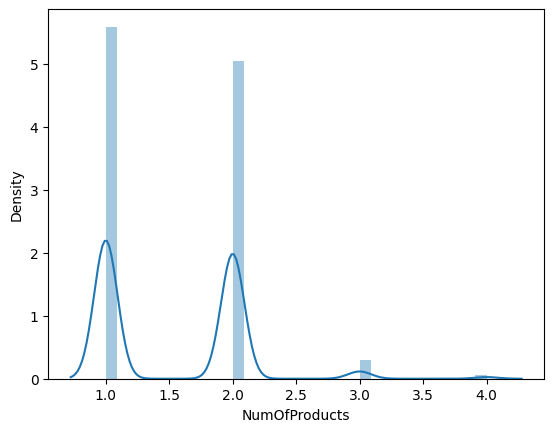

-0.9018115952400578


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


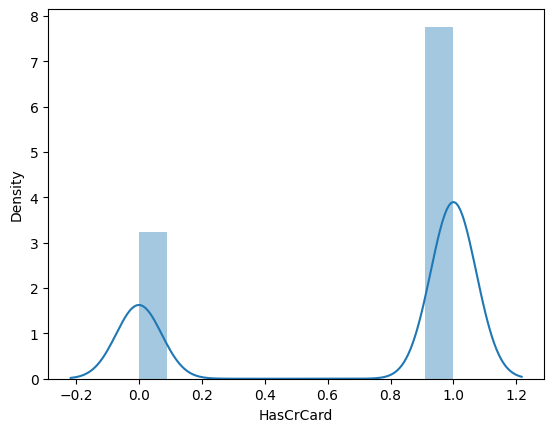

-0.06043662833499078


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


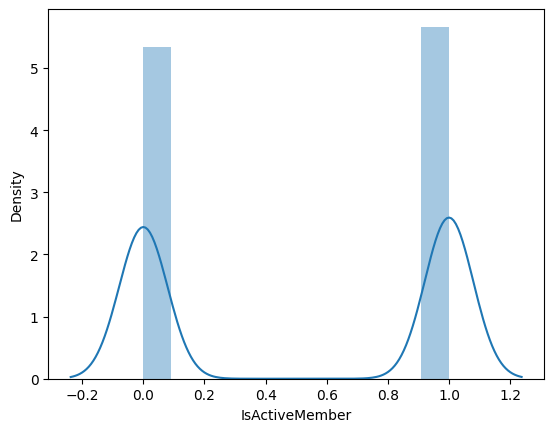

0.0020853576615585162


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


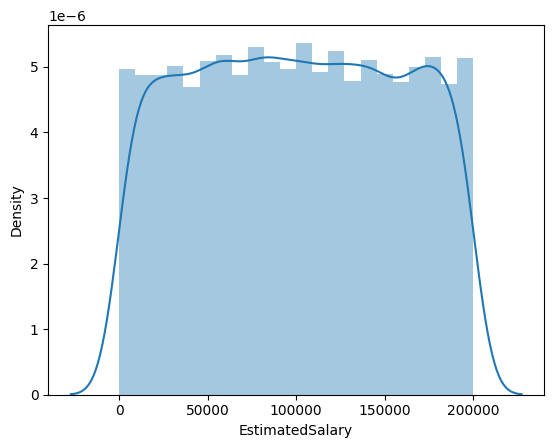

1.4716106649378211


<ipython-input-500-14140bb2c1ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


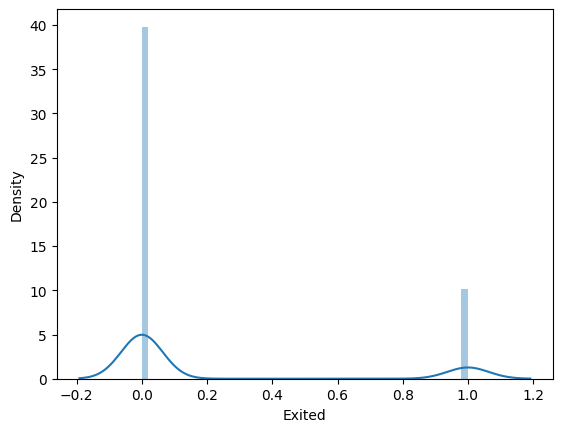

In [ ]:
for i in df.columns[df.dtypes!="object"]:
  plt.figure()
  print(df[i].skew())
  sns.distplot(df[i])
  plt.show()

<Axes: ylabel='count'>

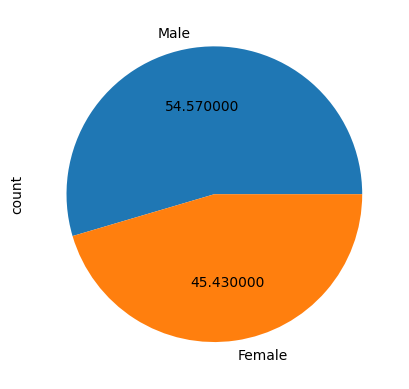

In [ ]:
df["Gender"].value_counts().plot(kind="pie",autopct='%2f')

<Axes: ylabel='count'>

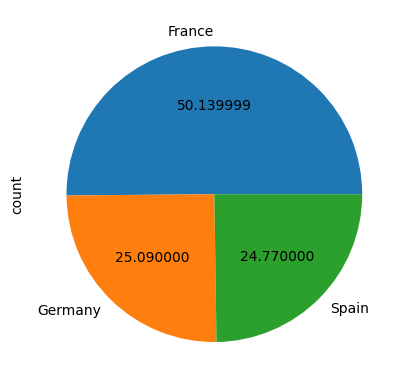

In [ ]:
df['Geography'].value_counts().plot(kind="pie",autopct='%2f')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(i,df[i].value_counts())


Surname Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
Geography Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [ ]:
pd.crosstab(df["Gender"],df['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
pd.crosstab(df['Geography'],df['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


<Axes: xlabel='CreditScore', ylabel='Age'>

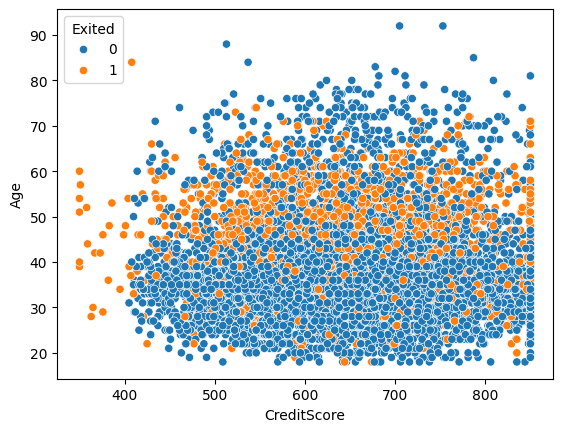

In [ ]:
sns.scatterplot(data=df,x=df['CreditScore'],y=df['Age'],hue=df['Exited'])

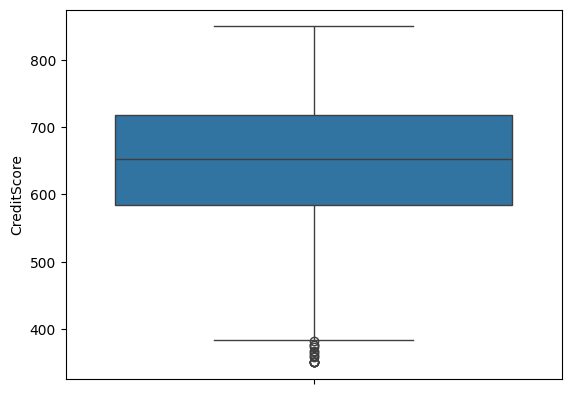

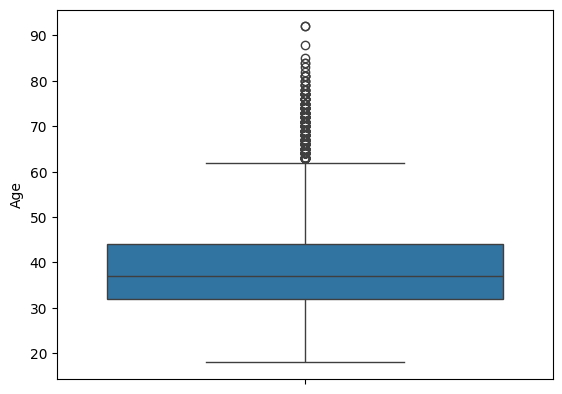

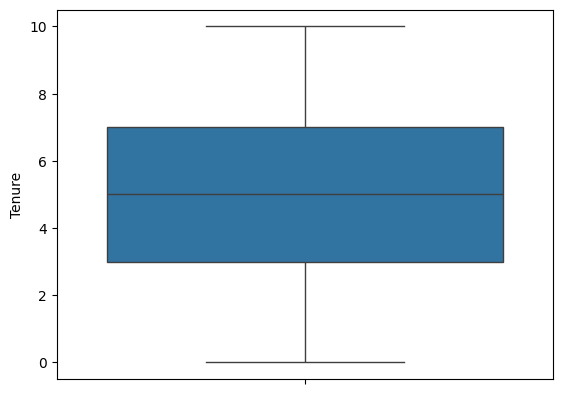

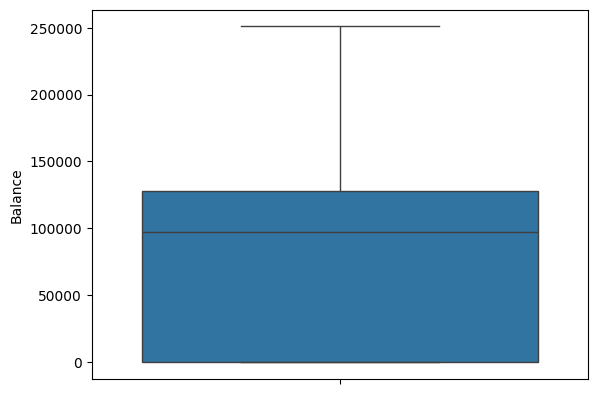

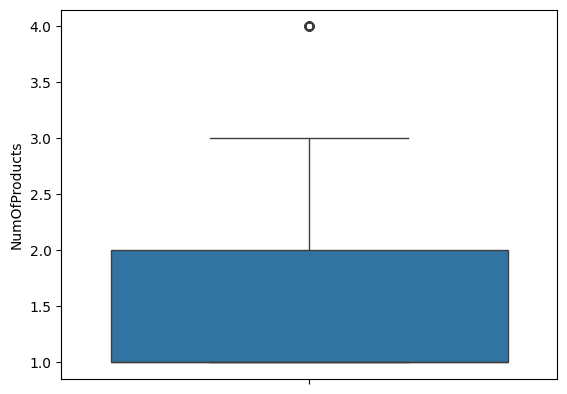

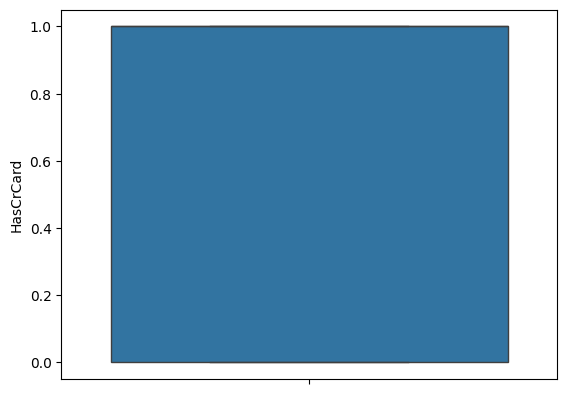

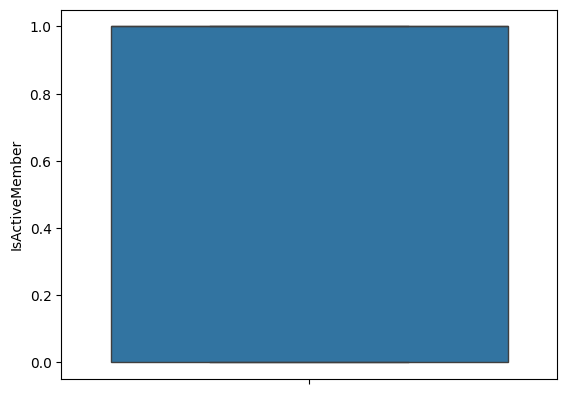

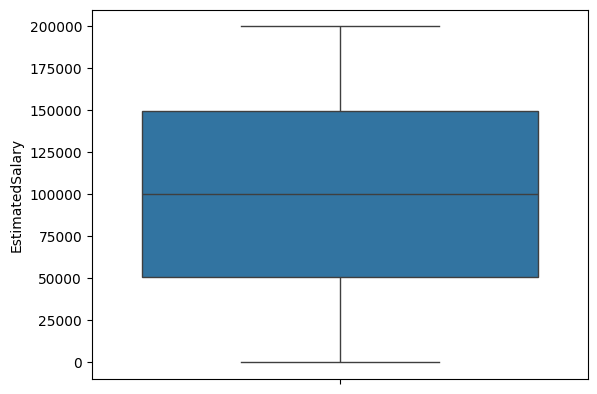

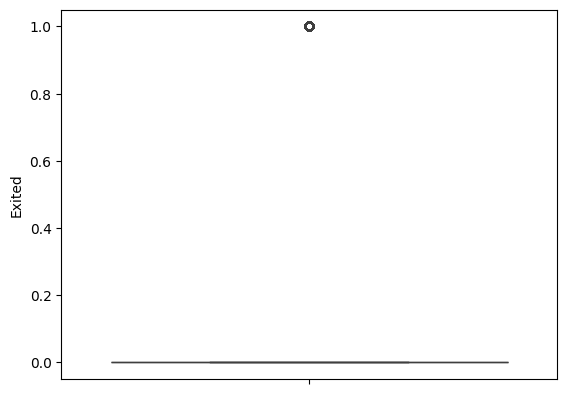

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()


In [ ]:
for i in df.columns[df.dtypes!='object']:

  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  iqr=percentile75-percentile25

  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr

  upper_limit_pct=((df[i]>upper_limit).sum()/df.shape[0])*100
  lower_limit_pct=((df[i]<lower_limit).sum()/df.shape[0])*100

  print(i,upper_limit_pct,lower_limit_pct)



CreditScore 0.0 0.15
Age 3.5900000000000003 0.0
Tenure 0.0 0.0
Balance 0.0 0.0
NumOfProducts 0.6 0.0
HasCrCard 0.0 0.0
IsActiveMember 0.0 0.0
EstimatedSalary 0.0 0.0
Exited 20.369999999999997 0.0


In [ ]:
outlier_to_remove=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [ ]:
for i in outlier_to_remove:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  iqr=percentile75-percentile25

  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr

  df[i]=np.where(df[i]>upper_limit,upper_limit,
                   np.where(df[i]<lower_limit,lower_limit,df[i]))

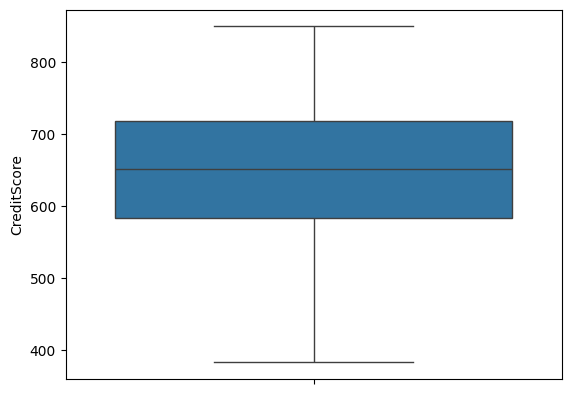

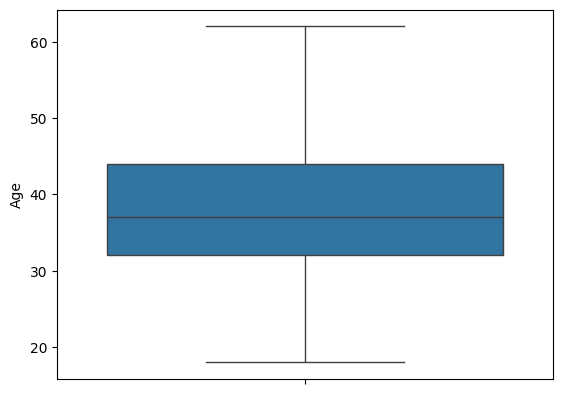

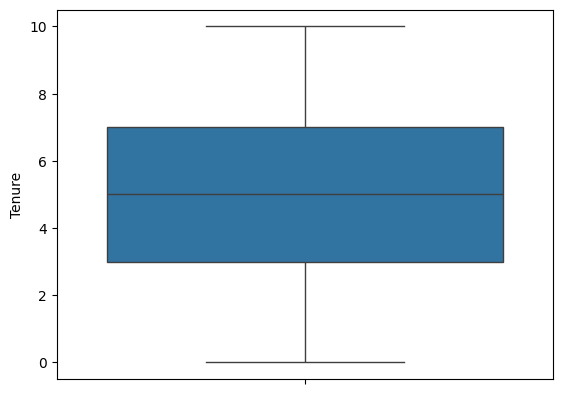

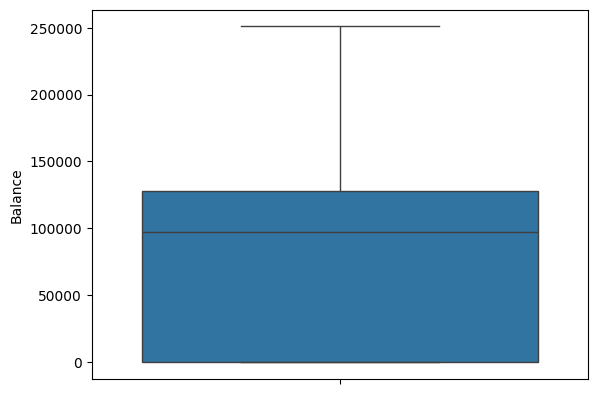

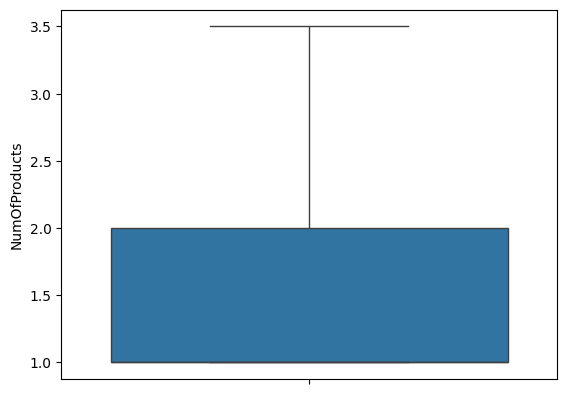

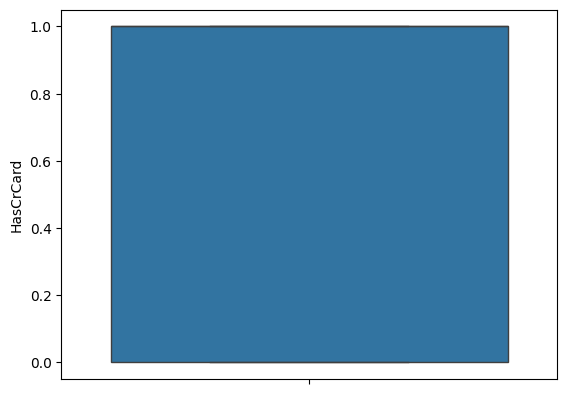

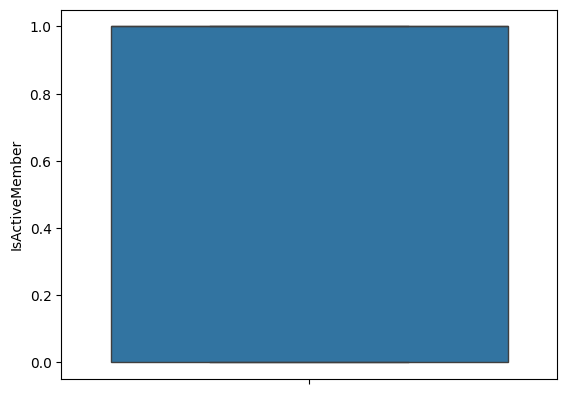

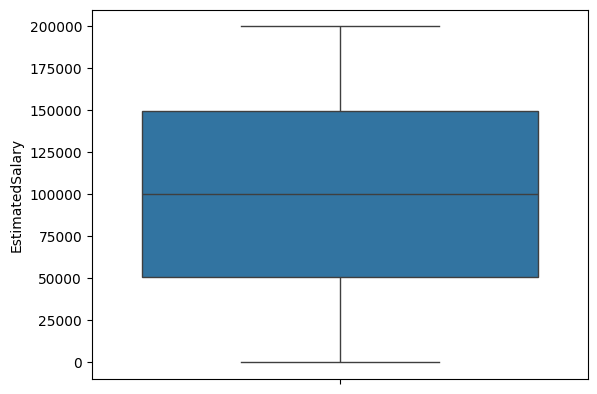

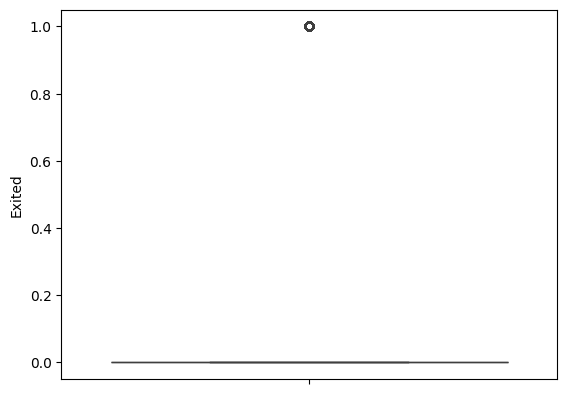

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(i,len(df[i].unique()))

Surname 2932
Geography 3
Gender 2


In [ ]:
[i for i in df.select_dtypes(include='object') if (df[i].value_counts()>20).all()]

['Geography', 'Gender']

In [ ]:
df.shape

(10000, 12)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
X

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000, 1), (2000, 1))

In [ ]:
X_train

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,P'an,686.0,France,Male,32.0,6.0,0.00,2.0,1.0,1.0,179093.26
1561,Leak,632.0,Germany,Male,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86
1670,Green,559.0,Spain,Male,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02
6087,Chukwudi,561.0,France,Female,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40
6669,Chinomso,517.0,France,Male,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...
5734,Henderson,768.0,France,Male,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05
5191,Chukwualuka,682.0,France,Female,58.0,1.0,0.00,1.0,1.0,1.0,706.50
5390,Macrossan,735.0,France,Female,38.0,1.0,0.00,3.0,0.0,0.0,92220.12
860,McGregor,667.0,France,Male,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04


**Encoding-OHE**

In [ ]:
Ohe_encode=["Geography","Gender"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)

In [ ]:
train_ohe=ohe.fit_transform(X_train[Ohe_encode])
test_ohe=ohe.transform(X_test[Ohe_encode])

In [ ]:
feature_names=ohe.get_feature_names_out(Ohe_encode)

In [ ]:
train_ohe_concat=pd.DataFrame(train_ohe,columns=feature_names)
test_ohe_concat=pd.DataFrame(test_ohe,columns=feature_names)

In [ ]:
X_train.drop(columns=Ohe_encode,inplace=True)
X_test.drop(columns=Ohe_encode,inplace=True)

In [ ]:
X_train=pd.concat([X_train.reset_index(drop=True),train_ohe_concat.reset_index(drop=True)],axis=1)
X_test=pd.concat([X_test.reset_index(drop=True),test_ohe_concat.reset_index(drop=True)],axis=1)

In [ ]:
X_train

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,P'an,686.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26,0.0,0.0,1.0
1,Leak,632.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86,1.0,0.0,1.0
2,Green,559.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02,0.0,1.0,1.0
3,Chukwudi,561.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40,0.0,0.0,0.0
4,Chinomso,517.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Henderson,768.0,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05,0.0,0.0,1.0
7996,Chukwualuka,682.0,58.0,1.0,0.00,1.0,1.0,1.0,706.50,0.0,0.0,0.0
7997,Macrossan,735.0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12,0.0,0.0,0.0
7998,McGregor,667.0,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04,0.0,0.0,1.0


In [ ]:
X_test

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,Anderson,596.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37,1.0,0.0,1.0
1,Herring,623.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30,0.0,0.0,1.0
2,Amechi,601.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31,0.0,1.0,0.0
3,Liang,506.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74,1.0,0.0,1.0
4,Chuang,560.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Klein,602.0,53.0,5.0,98268.84,1.0,0.0,1.0,45038.29,1.0,0.0,0.0
1996,Ndubuisi,609.0,25.0,10.0,0.00,1.0,0.0,1.0,109895.16,0.0,0.0,1.0
1997,Miller,730.0,47.0,7.0,0.00,1.0,1.0,0.0,33373.26,0.0,0.0,0.0
1998,Wu,692.0,29.0,4.0,0.00,1.0,1.0,0.0,76755.99,0.0,0.0,1.0


**Frequency_Encoding**

In [ ]:
#Surname

In [ ]:
X_train['Surname'].value_counts()

,count
Surname,
Shih,24
Smith,24
Martin,23
Genovese,23
Brown,22
...,...
Cantrell,1
McCaffrey,1
Burson,1


In [ ]:
X_train['Surname']=X_train["Surname"].map(X_train['Surname'].value_counts())


In [ ]:
X_train['Surname']

,Surname
0,6
1,1
2,7
3,8
4,5
...,...
7995,10
7996,5
7997,1
7998,19


In [ ]:
X_test["Surname"]=X_test["Surname"].map(X_test['Surname'].value_counts())

In [ ]:
X_train

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,6,686.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26,0.0,0.0,1.0
1,1,632.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86,1.0,0.0,1.0
2,7,559.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02,0.0,1.0,1.0
3,8,561.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40,0.0,0.0,0.0
4,5,517.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10,768.0,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05,0.0,0.0,1.0
7996,5,682.0,58.0,1.0,0.00,1.0,1.0,1.0,706.50,0.0,0.0,0.0
7997,1,735.0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12,0.0,0.0,0.0
7998,19,667.0,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04,0.0,0.0,1.0


In [ ]:
X_test

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,2,596.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37,1.0,0.0,1.0
1,1,623.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30,0.0,0.0,1.0
2,1,601.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31,0.0,1.0,0.0
3,2,506.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74,1.0,0.0,1.0
4,4,560.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,602.0,53.0,5.0,98268.84,1.0,0.0,1.0,45038.29,1.0,0.0,0.0
1996,1,609.0,25.0,10.0,0.00,1.0,0.0,1.0,109895.16,0.0,0.0,1.0
1997,5,730.0,47.0,7.0,0.00,1.0,1.0,0.0,33373.26,0.0,0.0,0.0
1998,6,692.0,29.0,4.0,0.00,1.0,1.0,0.0,76755.99,0.0,0.0,1.0


**Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.23862969,  0.35651162, -0.67855303, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-1.11113313, -0.20436787,  0.34415355, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.064129  , -0.96259384, -1.49671828, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [-1.11113313,  0.86545782, -0.06492908, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 2.02987926,  0.15916513,  0.4464242 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 2.9023827 ,  0.47076485,  1.26458946, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
X_test

array([[-0.93663245, -0.57828753, -0.67855303, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-1.11113313, -0.29784778,  0.4464242 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-1.11113313, -0.52635424,  0.54869486, ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [-0.41313038,  0.81352454,  0.85550683, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [-0.23862969,  0.41883156, -0.985365  , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.41313038, -0.2459145 ,  0.03734157, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rc=RandomForestClassifier(n_estimators=100,bootstrap=True)

In [ ]:
rc.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
y_pred=rc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

In [ ]:
accuracy_score(y_pred,y_test)

0.8685

In [ ]:
precision_score(y_pred,y_test)

0.4529262086513995

In [ ]:
f1_score(y_pred,y_test)

0.5751211631663974

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(rc,X_train,y_train,cv=5).mean()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

np.float64(0.861)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from keras.layers import *
from keras import regularizers
from keras import initializers
from tensorflow.keras.initializers import HeNormal,HeUniform
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#initializers=HeNormal()


In [ ]:
callback=EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,

)

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu',input_dim=12,kernel_initializer=HeNormal()))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(30,activation='relu',kernel_initializer=HeNormal()))
#model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(30,activation='relu',kernel_initializer=HeNormal()))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,641 (10.32 KB)

 Trainable params: 2,461 (9.61 KB)

 Non-trainable params: 180 (720.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=100,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5986 - loss: 0.7171 - val_accuracy: 0.8112 - val_loss: 0.4591
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7771 - loss: 0.4868 - val_accuracy: 0.8300 - val_loss: 0.4107
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8048 - loss: 0.4377 - val_accuracy: 0.8406 - val_loss: 0.3861
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8141 - loss: 0.4289 - val_accuracy: 0.8431 - val_loss: 0.3762
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8262 - loss: 0.3944 - val_accuracy: 0.8462 - val_loss: 0.3669
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8251 - loss: 0.3911 - val_accuracy: 0.8438 - val_loss: 0.3637
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8362 - loss: 0.3836 - val_accuracy: 0.8425 - val_loss: 0.3615
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8335 - loss: 0.3833 - val_accu

In [ ]:
y_pred1=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
y_pred1_binary = (y_pred1 > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1_binary)

0.858

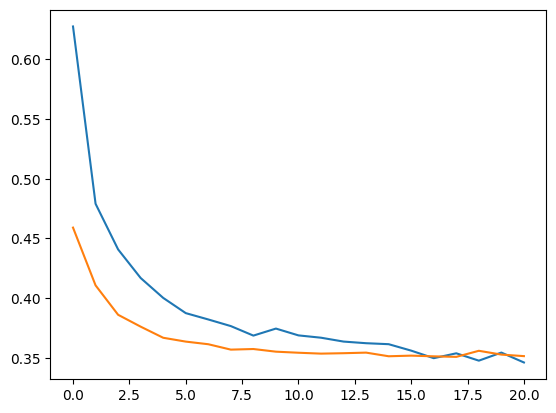

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

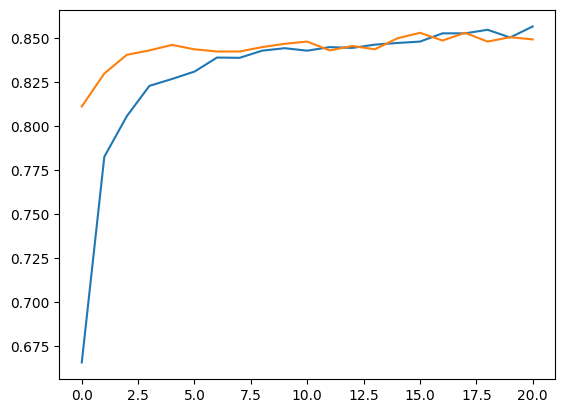

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])